In [391]:
from neuron import h
h.load_file('stdrun.hoc')
import numpy as np
import matplotlib.pyplot as plt
from stellate import Stellate
h.celsius = 37.0
h.steps_per_ms = 40
h.dt = 0.025
h.cvode_active(0)

0.0

In [436]:
stellate_0 = Stellate(0)
stell_theta_ic = h.IClamp(stellate_0.soma(0.5))
stellate_noise_ic = h.IClamp(stellate_0.soma(0.5))
stellate_noise_ic.dur = 1e9
stell_theta_ic.dur = 1e9

time_dur = 30000  # ms

mean, std = -3e-3, 3e-4
time_steps = int(time_dur / h.dt)

noise_arr = np.random.normal(0, std, time_steps)

half = time_steps // 3

# baseline inhibition
delta = 1e-3   
noise_arr[:half] += mean + delta
noise_arr[half:2*half] += mean 
noise_arr[2*half:] += mean +delta

noise_vec = h.Vector(noise_arr)
noise_vec.play(stellate_noise_ic._ref_amp, h.dt)  
#stellate_noise_ic.amp = -5e-3
theta_amp = 1e-5
theta_freq = 10.0
theta_arr = theta_amp * np.sin(2 * np.pi * theta_freq * np.arange(0, time_dur, h.dt) / 1000)
theta_dupe = theta_arr.copy()
theta_arr[half:] = 0.0
theta_vec = h.Vector(theta_arr)
theta_vec.play(stell_theta_ic._ref_amp, h.dt)

nc_stell = h.NetCon(stellate_0.soma(0.5)._ref_v, None, sec=stellate_0.soma)
nc_stell.threshold = 0
spike_times_stell = h.Vector()
nc_stell.record(spike_times_stell)

stell_v = h.Vector().record(stellate_0.soma(0.5)._ref_v)
stellate_gh_vec = h.Vector().record(stellate_0.soma(0.5).stellate_mech._ref_gh)
noise_input = h.Vector().record(stellate_noise_ic._ref_amp)
theta_input = h.Vector().record(stell_theta_ic._ref_amp)
stellate_gh_vec = h.Vector().record(stellate_0.soma(0.5).stellate_mech._ref_gh)
time = h.Vector().record(h._ref_t)



In [437]:
h.finitialize(-65)
h.continuerun(time_dur)



0.0

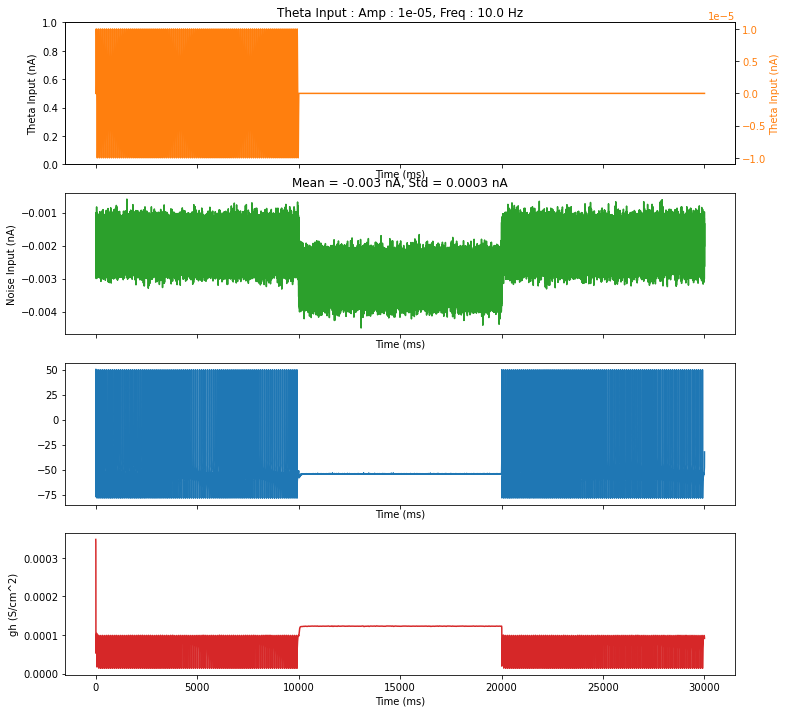

In [438]:

fig,ax = plt.subplots(4,1,figsize=(12, 12), sharex=True)
ax1 = ax[0].twinx()
ax1.plot(time, theta_input.to_python(), color='C1', label='Theta Input')
ax1.set_ylabel("Theta Input (nA)", color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
#plt.plot(time,noise_input.to_python())
ax[2].plot(time, stell_v.to_python())
ax[0].set_xlabel("Time (ms)")
ax[2].set_xlabel("Time (ms)")
ax[1].set_xlabel("Time (ms)")
ax[0].set_ylabel("Theta Input (nA)")
ax[1].set_ylabel("Noise Input (nA)")
ax[0].set_title(f"Theta Input : Amp : {theta_amp}, Freq : {theta_freq:.1f} Hz")
ax[1].set_title(f"Mean = {mean} nA, Std = {std} nA")
ax[1].plot(time,noise_input.to_python(), color='C2', label='Noise Input')
ax[3].plot(time, stellate_gh_vec.to_python(), color='C3', label='gh')
ax[3].set_xlabel("Time (ms)")
ax[3].set_ylabel("gh (S/cm^2)")
#plt.xlim(10000,12000)

plt.show()

In [439]:
spike_times_array = spike_times_stell.to_python()
print("Spike times (ms):", spike_times_array)
print("Interspike intervals (ms):", np.diff(spike_times_array))

Spike times (ms): [5.000000000100037, 59.27500000010492, 151.5500000000991, 247.6500000000117, 344.6249999999235, 441.97499999983495, 540.3249999998743, 639.5500000002353, 736.5750000005883, 834.350000000944, 933.1750000013035, 1030.9750000016593, 1129.1500000020164, 1227.5750000023745, 1326.8500000027357, 1426.1000000030967, 1524.8000000034558, 1623.525000003815, 1722.6750000041757, 1821.1250000045338, 1920.400000004895, 2017.8000000052493, 2116.7750000043584, 2216.1250000029127, 2316.9500000014455, 2416.200000000001, 2515.524999998556, 2614.8999999971097, 2714.399999995662, 2813.624999994218, 2913.049999992771, 3011.749999991335, 3112.4499999898694, 3211.0749999884342, 3312.4749999869587, 3411.9749999855107, 3513.124999984039, 3613.249999982582, 3713.4749999811233, 3813.3749999796696, 3910.4249999782573, 4008.9749999768233, 4109.424999975362, 4208.52499997392, 4309.949999972444, 4408.674999971007, 4506.1749999695885, 4605.874999968138, 4705.749999966684, 4806.449999965219, 4906.84999

ValueError: x and y must have same first dimension, but have shapes (400000,) and (800000,)

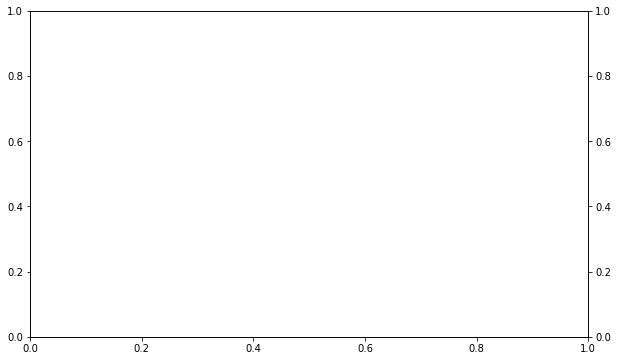

In [440]:
#subthreshold oscillations and theta oscillations
smpos_arr = stell_v.to_python()[half+1:]
theta_osc_arr = theta_dupe[half:]
fig,ax = plt.subplots(figsize=(10, 6))
ax1 = ax.twinx()
ax1.plot(time.to_python()[:half], theta_osc_arr, color='C1', label='Theta Oscillations')
ax1.set_ylabel("Theta Oscillations (nA)", color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
ax.plot(time.to_python()[:half], smpos_arr, color='C2', label='Subthreshold Oscillations')
ax.set_xlabel("Time (ms)")
ax.set_title("Subthreshold Oscillations and Theta Oscillations")
ax.legend(loc='upper left')

plt.show()

Spike phases (radians): [3.14159265e-01 3.72435809e+00 3.23898203e+00 2.99393780e+00
 2.80387144e+00 2.63736703e+00 2.53369448e+00 2.48499979e+00
 2.29807503e+00 2.15827415e+00 2.08444673e+00 1.94621665e+00
 1.83154852e+00 1.73258835e+00 1.68703526e+00 1.63991137e+00
 1.55822996e+00 1.47811934e+00 1.42471227e+00 1.32732290e+00
 1.28176980e+00 1.11840699e+00 1.05400434e+00 1.01316363e+00
 1.06499991e+00 1.01787602e+00 9.75464519e-01 9.36194611e-01
 9.04778684e-01 8.56083998e-01 8.19955682e-01 7.38274273e-01
 7.82256570e-01 6.95862772e-01 7.83827366e-01 7.52411440e-01
 8.24668071e-01 8.32522052e-01 8.46659219e-01 8.40376034e-01
 6.55022067e-01 5.63915880e-01 5.92190214e-01 5.35641546e-01
 6.25176936e-01 5.45066324e-01 3.87986691e-01 3.69137135e-01
 3.61283153e-01 4.05265450e-01 4.30398191e-01 5.02654822e-01
 6.59734455e-01 6.34601713e-01 5.63915879e-01 4.66526506e-01
 5.89048620e-01 6.84867196e-01 7.14712326e-01 7.68119401e-01
 7.41415863e-01 7.08429140e-01 7.11570733e-01 6.48738879e-01


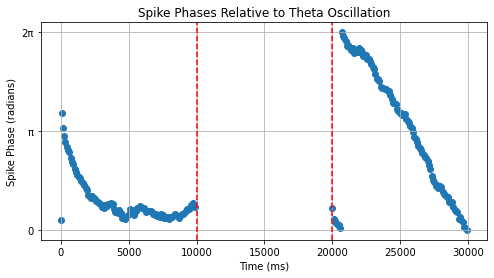

In [442]:
#spikes to phases
phases = (np.array(spike_times_array) * theta_freq * 2 * np.pi / 1000) % (2 * np.pi)
print("Spike phases (radians):", phases)

plt.figure(figsize=(8, 4))
plt.scatter(spike_times_array, phases, color='C0')
plt.xlabel("Time (ms)")
plt.ylabel("Spike Phase (radians)")
plt.title("Spike Phases Relative to Theta Oscillation")
plt.yticks([0, np.pi, 2 * np.pi], ['0', 'π', '2π'])
#plt.xlim(3500, time_dur+500)
plt.axvline(x=half*h.dt, color='r', linestyle='--', label='Disinhibition')
plt.axvline(x=2*half*h.dt, color='r', linestyle='--', label='Disinhibition')
#plt.text(0.7*half*h.dt, 1.8*np.pi, 'Disinhibition + Theta', color='r', ha='right', va='center')
#plt.text(3*half*h.dt, 1.8*np.pi, 'Disinhibition + No theta', color='r', ha='right', va='center')
#plt.text(half*1.5*h.dt, 1.8*np.pi, 'Inhibition', color='r', ha='center', va='center')
#plt.xlim(2000,4000)
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1200001


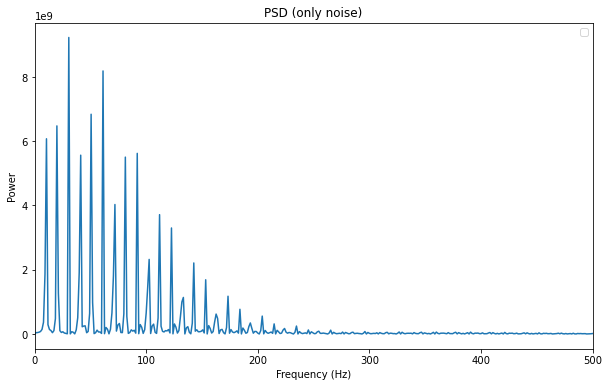

In [390]:
import analysis_utils as a_utils
print(len(stell_v.to_python()))
fft_freq,fft_sig,fft_power = a_utils.calc_fft(stell_v.to_python()[10000:40000])
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, fft_power)
plt.xlim(0, 350)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
#plt.axvline(x=1000/37.1, color='r', linestyle='--', label=f'Dominant Frequency: {1000/62.2:.2f} Hz  ')
#plt.axvline(x=theta_freq, color='r', linestyle='--')
plt.xlim(0,1000)
plt.title("PSD (only noise)")
plt.legend()
plt.xlim(0,500)
plt.show()

Impedance Analysis

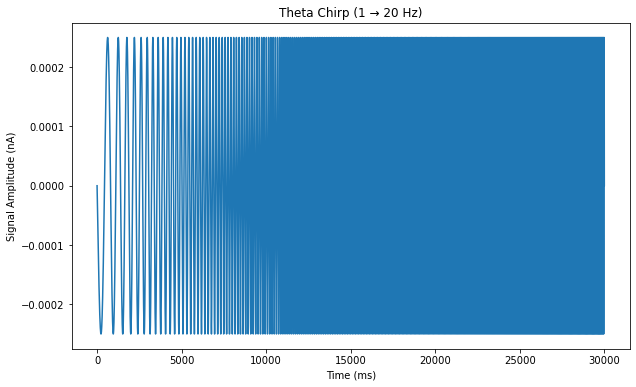

In [162]:
time_arr = np.arange(0, 30000, h.dt)  # ms
t_sec = time_arr / 1000.0                # convert to seconds

min_freq = 1.0
max_freq = 20.0
theta_amp = -2.5e-3

k = (max_freq - min_freq) / (t_sec[-1])  # Hz per second

phase = 2 * np.pi * (min_freq * t_sec + 0.5 * k * t_sec**2)

signal_arr = theta_amp/10 * np.sin(phase)

plt.figure(figsize=(10,6))
plt.plot(time_arr, signal_arr)
plt.xlabel("Time (ms)")
plt.ylabel("Signal Amplitude (nA)")
plt.title("Theta Chirp (1 → 20 Hz)")
plt.show()

1200000


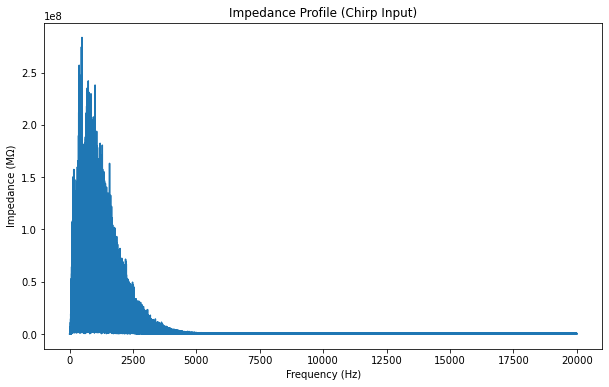

max  283537522.7494601
at 490.4997956250852
Q factor: 2550.585651801468


In [110]:
chirp_ic = h.IClamp(stellate_0.soma(0.5))
chirp_ic.dur = 1e9
chirp_vec = h.Vector(signal_arr)
chirp_vec.play(chirp_ic._ref_amp, h.dt)

imp_i = h.Vector().record(chirp_ic._ref_amp)
imp_v= h.Vector().record(stellate_0.soma(0.5)._ref_v)

time = h.Vector().record(h._ref_t)
h.finitialize(-55)
h.continuerun(time_dur*3)

i_mean = np.mean(imp_i.to_python())
imp_i_arr = imp_i.to_python() - i_mean
v_mean = np.mean(imp_v.to_python())
imp_v_arr = imp_v.to_python() - v_mean

volt_fft_freq, volt_fft_sig, volt_fft_power = a_utils.calc_fft(imp_v_arr)
curr_fft_freq, curr_fft_sig, curr_fft_power = a_utils.calc_fft(imp_i_arr)

print(len(curr_fft_freq))
impedance = np.abs(volt_fft_sig / curr_fft_sig)
plt.figure(figsize=(10, 6))
plt.plot(curr_fft_freq, impedance)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance (MΩ)")
plt.title("Impedance Profile (Chirp Input)")   
     
plt.show()  


print("max ",np.max(impedance))
print("at", curr_fft_freq[np.argmax(impedance)])
print("Q factor:", np.max(impedance) / impedance[0])